<h1><center>Laboratorio 7: Aprendizaje Supervisado 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matías Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Andrés Gonzalez Fuentes
- Nombre de alumno 2: Camilo Carvajal Reyes


### **Link de repositorio de GitHub:** `https://github.com/camilocarvajalreyes/laboratorios-MDS7202`

## Temas a tratar

- Aprendizaje Supervisado
- Flujos de datos a través de `Pipelines`.

## Reglas

- Fecha de entrega: TBD
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

## Objetivos principales del laboratorio

- Comprender el funcionamiento de clasificadores/regresores.
- Generar múltiples modelos predictivos.
- Comprender las ventajas de crear modelos en pipeline vs hacer las operaciones a mano.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre `DataFrames`.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#Libreria para plotear
# !pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

https://www.kaggle.com/antoinekrajnc/soccer-players-statistics

# 1. Predicciones Futboleras

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones. 

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con los csv `statsplayers.csv` y `salarios.pickle`, donde deberán aplicar algoritmos de de aprendizaje supervisado (clasificación y regresión) en base a características que describen de jugadores de futbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [2]:
df_players = pd.read_csv('stats_players.csv')
df_players

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,NaN,Sub,183,82,Right,19,Medium / Medium,1,...,27,56,14,16,13,13,11,13,15,12
17584,Dylan McGoey,Republic of Ireland,NaN,Sub,185,80,Right,19,Medium / Medium,2,...,28,53,12,17,12,11,12,13,16,12
17585,Tommy Ouldridge,England,NaN,Res,173,61,Right,18,High / Medium,2,...,54,61,41,44,28,42,35,36,42,37
17586,Mark Foden,Scotland,NaN,Sub,180,80,Right,21,Medium / Medium,3,...,34,48,15,23,14,12,13,12,24,12


## 1.1 Predicción de Seleccionados Nacionales 

Como primera tarea, Renacín, intrigado por la posibilidad de saber qué tan reconocido es un jugador, le consulta a su equipo si es posible predecir si un jugador será o no seleccionado nacional a partir de sus estadísticas en el juego. 

<p align="center">
  <img src="https://thumbs.gfycat.com/ThornyFrankFoxhound-size_restricted.gif" width="500">
</p>

### 1.1.1 Generación de Labels para la Clasificación [Sin Puntaje]


Primero comience generando las labels para la clasificación. Para esto, trabaje sobre el atributo ```National_Position``` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. 

Hecho esto, ¿Cuantos ejemplos por cada clase se tienen? Comente lo que observa.



**Respuesta:**

In [3]:
seleccion = df_players['National_Position'].notna().astype(int)
seleccion.value_counts()

0    16513
1     1075
Name: National_Position, dtype: int64

In [4]:
seleccion.value_counts(normalize=True)

0    0.938879
1    0.061121
Name: National_Position, dtype: float64

> Respuesta: Se observa un desbalance entre abas clases. Como es de esperar, dentro de la lista entera de jugadores solo algunos jugadores (6%) son suficientemente buenos para jugar en su selección nacional. En términos de frecuencias esto es 1075 seleccionados contra 16513 no seleccionados.

### 1.1.2 Camino a la clasificación [1 punto]

<p align="center">
  <img src="https://c.tenor.com/SoXZJHWnhKAAAAAC/pitbull-medel.gif" width="500">
</p>

Para preprocesar el dataset, genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guardelo en algúna variable.

Luego, comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material ```Player_Stats_Report.html``` que viene en el zip del lab), al igual que las transformaciones aplicadas.

Hecho lo anterior, **defina al menos 3 pipelines para la clasificación**, en donde utilice el mismo ColumnTransformer definido anteriormente, pero que varie entre cada pipeline los clasificadores. 

Para seleccionar los clasificadores más adecuados, utilice la siguiente guía:

<p align="center">
  <img src="https://scikit-learn.org/stable/_static/ml_map.png" width="500">
</p>

<br/>

Con ella, comente y justifique cada una de las decisiones tomadas al momento de desarrollar su pipeline.

**Nota:** Si tiene problemas al utilizar OneHotEncoder puede utilizar el parámetro handle_unknown='ignore'. Esto hace que en la codificación se omitan las categorias que no aparecen en el entrenamiento. Pregunta dudosa (no tiene puntaje), ¿esto tiene sentido a nivel de modelos?.

**To-Do:**

- [x] Genere un ```ColumnTransformer``` enfocado en preprocesar los datos.
- [x] Indicar y Justificar que preprocesamiento utiliza sobre cada columna.
- [x] Crear 3 ``pipelines`` con diferentes clasificadores.
- [x] Para seleccionar los clasificadores base sus decisiones en la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
- [ ] No entrenar los ``pipelines`` aún.

**Nota:** No es necesario entrenar los clasificadores aún.

> **Explicación pre-procesamiento de columnas**:
- Columnas a eliminar: Name no aporta información relevante, asi que la ignoramos para efectos de nuestros clasificadores. Similarmente, eliminamos la columa National_Position, pues nos entregaría la información que queremos predecir.
- Columnas categóricas: en este caso aplicamos OneHotEncoding, siendo el caso para la nacionalidad, posición (en club), la pierna hábil, tasa de trabajo, ...
- Columnas con distribución cercana a normal: En este caso aplicamos un escalamiento estándar, para que la variables queden en la misma escala. Será el caso de todas las variables numéricas a no ser que se alejen demasiado de una distribución normal.
- Columnas con distribución distinta a normal: separamos esto en dos casos. Para variables donde aparentemente hay dos peaks, uno más pequeño seguido de uno grande después, usaremos la transformación PowerTransformer con el método Box-Cox (se puede pues todas ls variables son positivas). Esto nos permite aproximar tal geometría con una distribución que si será Gaussiana. Un ejemplo de tal columna es Ball_Control. Por otro lado, columnas con otras geometrias usaremos simplemente MinMax. Tal es el caso de la edad, Skill_Moves y Finishing (esta última parece casi una uniforme).

In [5]:
preprocesisng = ColumnTransformer(
    transformers=[
        ('OneHotEncoder',OneHotEncoder(handle_unknown='ignore'),['Nationality','Club_Position','Preffered_Foot','Work_Rate']),
        ('StandardScaler',StandardScaler(), ['Height','Weight','Weak_foot','Reactions','Vision','Composure',
                                                'Acceleration','Speed','Strength','Balance','Agility','Jumping']),
        ('MinMaxScaler',MinMaxScaler(),['Age','Skill_Moves','Finishing']),
        ('BoxCox',PowerTransformer(method='box-cox'),['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
                                                    'Standing_Tackle', 'Interceptions', 'Crossing', 'Short_Pass',
                                                    'Long_Pass', 'Stamina', 'Heading', 'Shot_Power', 'Long_Shots',
                                                'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'Aggression'])
])

> **Respuesta clasificadores:**
La gúia de estimadores de Sckikit-learn nos sugiere primeramente el uso de un clasificador Support-Vector lineal pues tenemos menos de 100.000 valores en nuestro dataset. En seguida, en caso de que no funcione, se sugiere el uso de un clasificador basado en k-vecinos, para luego usar otro tipo de clasificador Support-Vector o bien un método de aprendizaje _ensemble_. Probaremos el support vector lineal, k-vecinos y finalmente un clasificador de árbol de decisión.

In [6]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

svm_lineal = Pipeline([
    ('Pre-procesamiento',preprocesisng),
    ('Clasificador',LinearSVC(random_state=0,max_iter=10000))
])

k_neighbours = Pipeline([
    ('Pre-procesamiento',preprocesisng),
    ('Clasificador',KNeighborsClassifier())
])

decision_tree = Pipeline([
    ('Pre-procesamiento',preprocesisng),
    ('Clasificador',DecisionTreeClassifier(random_state=0))
])

### 1.1.3 Entrenemos los pipelines [1 punto]

<p align="center">
  <img src="https://i.gifer.com/7Cc8.gif" width="350">
</p>


Ahora, entrene los `pipeline` generados en los pasos anteriores. Para esto, primero separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio).

En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`).


Luego, entrene los pipelines

Una vez entrenado su modelo, evalue su rendimiento a través de diferentes métricas, comentando que significa cada uno de los valores obtenidos. Puede usar la función `classification_report` para corroborar sus resultados.

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
- ¿Podrían mejorarse los resultados?, ¿Cómo?
- ¿Influye la cantidad de ejemplos por clase?

**To-Do**:

- [x] Separar el conjunto de datos en entrenamiento y de prueba.
- [x] Entrenar los `pipelines`.
- [x] Utilizar las métricas para evaluar los modelos generados.


**Respuesta:**

In [7]:
df_train, df_test, y_train, y_test = train_test_split(df_players, seleccion, test_size=.25, stratify=seleccion)
seleccion.value_counts(normalize=True)

0    0.938879
1    0.061121
Name: National_Position, dtype: float64

In [8]:
seleccion.value_counts(normalize=True)

0    0.938879
1    0.061121
Name: National_Position, dtype: float64

In [9]:
print("Tamaño de entrenamiento: {}".format(df_train.shape))
print("Tamaño de test: {}".format(df_test.shape))

Tamaño de entrenamiento: (13191, 39)
Tamaño de test: (4397, 39)


In [10]:
print("Resultados clasificación SVM lineal")
svm_lineal.fit(df_train, y_train)
y_svm = svm_lineal.predict(df_test)
print(classification_report(y_test,y_svm))

Resultados clasificación SVM lineal
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4128
           1       0.64      0.36      0.46       269

    accuracy                           0.95      4397
   macro avg       0.80      0.67      0.72      4397
weighted avg       0.94      0.95      0.94      4397



In [11]:
print("Resultados clasificación k-vecinos")
k_neighbours.fit(df_train, y_train)
y_kn = k_neighbours.predict(df_test)
print(classification_report(y_test,y_kn))

Resultados clasificación k-vecinos
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4128
           1       0.47      0.07      0.12       269

    accuracy                           0.94      4397
   macro avg       0.71      0.53      0.55      4397
weighted avg       0.91      0.94      0.92      4397



In [12]:
print("Resultados clasificación árbol de decisión")
decision_tree.fit(df_train, y_train)
y_dt = decision_tree.predict(df_test)
print(classification_report(y_test,y_dt))

Resultados clasificación árbol de decisión
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4128
           1       0.35      0.37      0.36       269

    accuracy                           0.92      4397
   macro avg       0.66      0.66      0.66      4397
weighted avg       0.92      0.92      0.92      4397



**Respuesta**:

- ¿Qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional)?
`El accuracy representa la precisión general de la clasificación. Como en este caso las clases están desbalanceadas, esta métrica no es la más propiada para analizar la clasificación, pues será alta si el número de ejemplos bien clasificados de la clase más numeroso es alto. Los resultados, por lo dicho anteriormente, son altos para los tres clasificadores, siendo el árbol de decisión ligeramente peor. Por otro lado, precisión de la clase positiva representa la proporción de elementos clasificados como positivos que efectivamente lo eran. Para esta métrica, el mejor clasificador es SVM lineal con el 63%, mientras que los otros dos están en el orde del 40%.`

    `Por último el recall es una medida de sensibilidad, en el sentido de que aquellos jugadores que si son seleccionados sean efectivamente catalogados como seleccionados. Esta métrica es práctixamente 0 para k-vecinos, mientras que árbol de decisión supera por poco al árbol de decisión con 0.4.. Podríamos decir que este es el mejor clasificador en este sentido, sin embargo el valor de f1, que pondera tanto precision como recall, es más alto para SVM lineal.`
- ¿Podrían mejorarse los resultados?, ¿Cómo?
`Los resultados podrían mejorarse calibrando los parámetros propios de cada clasificador. Hemos usado los métodos con sus valores por defecto, excepto por SVM lineal donde aumentamos el límite de pasos. Idealmente, una búsqueda de grilla apropiada nos permitiría tener clasificadores que modelen los datos de mejor manera.`
- ¿Influye la cantidad de ejemplos por clase?
`La cantidad de ejemplos juega un rol en ciertas métricas como accuracy, lo cual se explicó anteriormente. Pero además, tener las clases desbalanceadas es en general negativo para el entrenamiento. Otra manera de mejorar los resultados es balancear las clases para el conjunto de entrenamiento mediante subsampling o oversampling.`

## 1.2 Predicción de posiciones de jugadores [2 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="500">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas. 

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características. 

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo ```Club_Position```, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF'] 
central_ataque = ['RW', 'CAM', 'LW'] 
central = ['RM', 'CM', 'LM'] 
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

Cabe señalar que al igual como lo realizado con la clasificación binaria, deberá justificar en base a la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) la elección del clasificador y se deben comentar los resultados obtenidos en la clasificación.

**Nota:** Clasifique solamente con las clases señaladas, si observa mas clases eliminelas de la clasficación.

**To-Do**:

- [x] Aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección.
- [x] Cuente cuantos por clase quedan.
- [x] Entrene el nuevo pipeline y ejecute una evaluación de este.  
- [x] Comente los resultados obtenidos.

**Respuesta:**

- **Etiquetas**

In [13]:
df_players['Club_Position'].replace({'ST':'ataque', 'CF':'ataque',
                                    'RW':'central_ataque', 'CAM':'central_ataque', 'LW':'central_ataque',
                                    'RM':'central', 'CM':'central', 'LM':'central',
                                    'RWB':'central_defensa', 'CDM':'central_defensa', 'LWD':'central_defensa',
                                    'RB':'defensa', 'CB':'defensa', 'LB':'defensa',
                                    'GK':'arquero'}, inplace=True)

positions = ['ataque', 'central_ataque', 'central', 'central_defensa', 'defensa', 'arquero']
position_mask = [pos in positions for pos in df_players['Club_Position']]
positions_df = df_players.loc[position_mask].copy()                                    

- **Conteo de clases**

In [14]:
positions_df['Club_Position'].value_counts()

defensa            1180
central             907
arquero             632
central_ataque      581
ataque              430
central_defensa     164
Name: Club_Position, dtype: int64

- **Nuevo pre-procesador**

In [15]:
preprocessing2 = ColumnTransformer(
    transformers=[
        ('OneHotEncoder',OneHotEncoder(handle_unknown='ignore'),['Nationality','Preffered_Foot','Work_Rate']),
        ('StandardScaler',StandardScaler(), ['Height','Weight','Weak_foot','Reactions','Vision','Composure',
                                                'Acceleration','Speed','Strength','Balance','Agility','Jumping']),
        ('MinMaxScaler',MinMaxScaler(),['Age','Skill_Moves','Finishing']),
        ('BoxCox',PowerTransformer(method='box-cox'),['Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
                                                    'Standing_Tackle', 'Interceptions', 'Crossing', 'Short_Pass',
                                                    'Long_Pass', 'Stamina', 'Heading', 'Shot_Power', 'Long_Shots',
                                                'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'Aggression'])
])

In [16]:
df_train, df_test, y_train, y_test = train_test_split(positions_df, positions_df['Club_Position'], test_size=.25, stratify=positions_df['Club_Position'])
print("Tamaño de entrenamiento: {}".format(df_train.shape))
print("Tamaño de test: {}".format(df_test.shape))

Tamaño de entrenamiento: (2920, 39)
Tamaño de test: (974, 39)


- **Pipelines**

In [17]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

svm_lineal = Pipeline([
    ('Pre-procesamiento',preprocessing2),
    ('Clasificador',LinearSVC(random_state=0,max_iter=10000))
])

k_neighbours = Pipeline([
    ('Pre-procesamiento',preprocesisng),
    ('Clasificador',KNeighborsClassifier())
])

decision_tree = Pipeline([
    ('Pre-procesamiento',preprocesisng),
    ('Clasificador',DecisionTreeClassifier(random_state=0))
])

- **Entrenamiento**

In [18]:
svm_lineal.fit(df_train, y_train)
y_svm = svm_lineal.predict(df_test)

k_neighbours.fit(df_train, y_train)
y_kn = k_neighbours.predict(df_test)

decision_tree.fit(df_train, y_train)
y_dt = decision_tree.predict(df_test)

- **Resultados**

In [20]:
print('*'*60 + "\nResultados clasificación SVM lineal\n"+ '*'*60 +'\n'+ classification_report(y_test,y_svm)+'-'*60)
print('*'*60 + "\nResultados clasificación k-vecinos\n"+ '*'*60 +'\n'+ classification_report(y_test,y_kn)+'-'*60)
print('*'*60 + "\nResultados clasificación árbol de decisión\n"+ '*'*60 +'\n'+ classification_report(y_test,y_dt)+'-'*60)

************************************************************
Resultados clasificación SVM lineal
************************************************************
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       158
         ataque       0.78      0.91      0.84       108
        central       0.62      0.65      0.64       227
 central_ataque       0.63      0.34      0.45       145
central_defensa       0.53      0.39      0.45        41
        defensa       0.83      0.96      0.89       295

       accuracy                           0.77       974
      macro avg       0.73      0.71      0.71       974
   weighted avg       0.76      0.77      0.76       974
------------------------------------------------------------
************************************************************
Resultados clasificación k-vecinos
************************************************************
                 precision    recall  f1-score   sup

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_test, y_pred, labels, ax):
    if ax is None:
        ax = plt.gca()
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    cm_disp.plot(ax=ax)
    ax.set_xticklabels(svm_lineal.classes_, rotation=30)

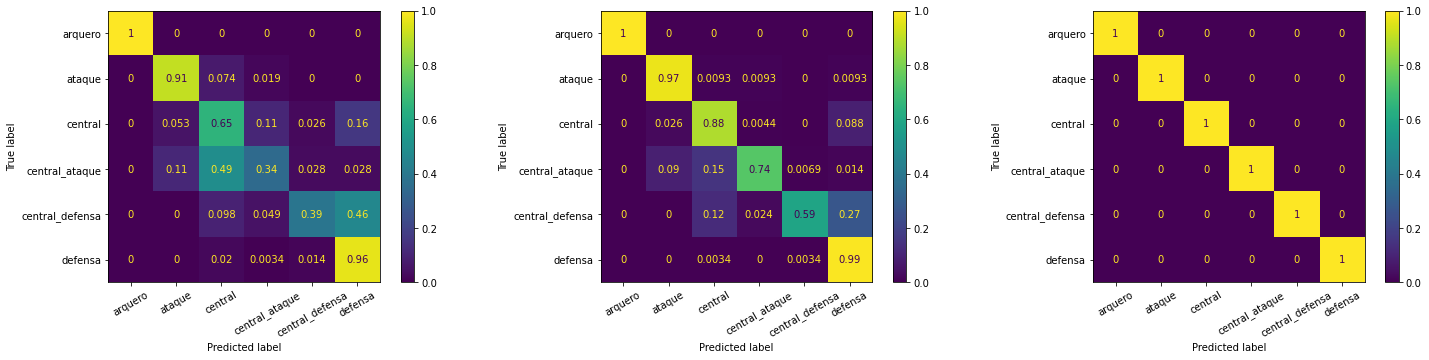

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 3, figsize=(25,5))

pos_classes = ['arquero', 'ataque', 'central', 'central_ataque','central_defensa', 'defensa']
plot_confusion_matrix(y_test, y_svm, labels=pos_classes, ax=ax[0])
plot_confusion_matrix(y_test, y_kn, labels=pos_classes, ax=ax[1])
plot_confusion_matrix(y_test, y_dt, labels=pos_classes, ax=ax[2])

plt.show()

**Respuesta**:

```
Primero, es necesario comentar que el set de datos considerando como target la posición del jugador es altamente desbalanceada, un ejemplo de esto es comparar la cantidad de defensas con la cantidad de defensas centrales, en donde la primera es casi 7 veces más numerosa que la última, lo que afecta directamente los resultados.

- SVM lineal: Se observa que, si bien central_defensa y central_ataque son las clases más minoritarias, la razón preponderante por sus métricas más bajas parece ser porque se no logra distinguir entre las posiciones centrales, indicando que las características que se comparten no son suficientes para separarlas con un hiperplano.

- K-vecinos: En general se tiene que todas las métricas mejoran en comparación al SVM lineal, pero se sigue manteniendo el problema de distinguir entre los 3 tipos de centrales, y además distinguir entre defensa y defensa_central.

- Árbol de decisión: Este modelo viene a mostrar un desempeño prácticamente perfecto al clasificar, y se observa al resolver el problema de distinguir entre los 3 tipos de centrales, que era el mayor problema para los clasificadores anteriores. Se muestra además que este clasificador fue robusto al desbalance de las clases.

Finalmente, los resultados obtenidos para los dos primeros clasificadores pueden contar con una amplia mejora de elegir mejor los hiperparámetros. Por ejemplo para el SVM se podría cambiar el tipo de kernel a uno que pueda ajustarse mejor a espacios más complejos para así lograr separar los 3 tipos de centrales. Para los k-vecines también puede haber mejorías, ya sea cambiando el número de vecines, el tamaño de las hojas, o hacer que los puntos ocupen pesos en función de las distancias, ya que esto por default es uniforme para todos los datos.

```

## 1.3 Predicción de Sueldos [2 puntos]

<p align="center">
  <img src="https://media.giphy.com/media/3oEjHWtHAFcOKS4iA0/giphy.gif" width="460">
</p>

Queriendo ahondar aún más en el mercado del balompíe, Renacin, logra obtener (de una manera no muy formal) los sueldos de múltiples futbolistas y los guarda en el archivo ```sueldos.csv```. Con ellos les solicita que generen un regresor que les permita predecir el sueldo de los futbolistas en base a las características de los pichichis, esto, debido a su motivación por invertir y/o realizar especulación sobre los sueldos de jugadores.

Renacin es claro señalando que deben seguir utilizando la [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y comenten cada uno de los pasos realizados, para obtener su regresión lineal. Señalándoles que no aceptara un $R^2$ inferior a 0.35 para el modelo solicitado.

Para esta parte usted tiene total libertad en la generación del regresor, la unica exigencia es que utilice un pipeline para generar la regresión y utilice la metrica $R^2$ para medir el rendimiento de esta.

**To-Do**:

- [ ] Explique en que consiste la métrica $R^2$
- [ ] Generar un pipeline para la regresión.
- [ ] Obtener un regresor con un $R^2$ superior a  $0.35$.
- [ ] Comente sus resultados y si es posible mejorar los resultados obtenidos. ¿Se necesitarían más datos o otros tipos de características o una combinación de ambos?

**Respuesta**

In [22]:
### Código aquí ###

**Respuesta**:

```
Comente de resultados observados y si es posible mejorar los resultados.
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media2.giphy.com/media/l1J3CbFgn5o7DGRuE/giphy.gif">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>